# **Proyek Akhir : Apple Classification**

### **Remote Connection to Kaggle**

Mengkonfigurasi dan mengatur koneksi dari Kaggle ke Google Colaboratory. Ini dilakukan untuk mengambil dataset yang tersedia di Kaggle untuk digunakan dalam pengembangan model di Colaboratory.

Menyiapkan token API kaggle menggunakan gdown command yang nantinya digunakan sebagai koneksi untuk mengunduh dataset yang diperlukan.

**Dataset Preparation**

In [ ]:
# download json >> https://drive.google.com/file/d/1d-u54I-Ja0jqJlf6rQlzdJ9fsezyQo0H/view?usp=sharing
! pip install gdown==4.6.0
! gdown 1d-u54I-Ja0jqJlf6rQlzdJ9fsezyQo0H
! ls

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1d-u54I-Ja0jqJlf6rQlzdJ9fsezyQo0H
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 377kB/s]
kaggle.json  sample_data


In [ ]:
# API Credentials my kaggle
! mkdir ~/.kaggle
! cp '/content/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

kaggle.json


In [ ]:
# source dataset -> https://www.kaggle.com/datasets/noalain/fruitmate
! kaggle datasets download noalain/fruitmate

 25% 5.00M/20.0M [00:00<00:00, 25.4MB/s]
100% 20.0M/20.0M [00:00<00:00, 76.0MB/s]


In [ ]:
# unzip
! unzip fruitmate.zip -d /content/data/

Archive:  fruitmate.zip
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe004.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe006.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe007.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe008.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe011.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe012.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe021.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe022.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe023.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe027.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe028.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe029.jpeg  
  inflating: /content/data/Dataset FIX/Testing/Overripe/Overripe036.jpeg  
 

**Load Dataset**

Aini Dataset. Image dataset containing different ripe, overripe and unripe fruits. This dataset consists of about 100 rgb images which is categorized into 3 different classes.

In [ ]:
import os

# define train, val directory and base directory
base_dir = '/content/data/Dataset FIX/'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation')
testing_dir = os.path.join(base_dir, 'Testing')

**Image Augmentation**

In [ ]:
# image data generator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1./255 )

In [ ]:
# data augmentation
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 100,
    color_mode = "rgb",
    class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 100,
    color_mode = "rgb",
    class_mode = 'categorical')

Found 450 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


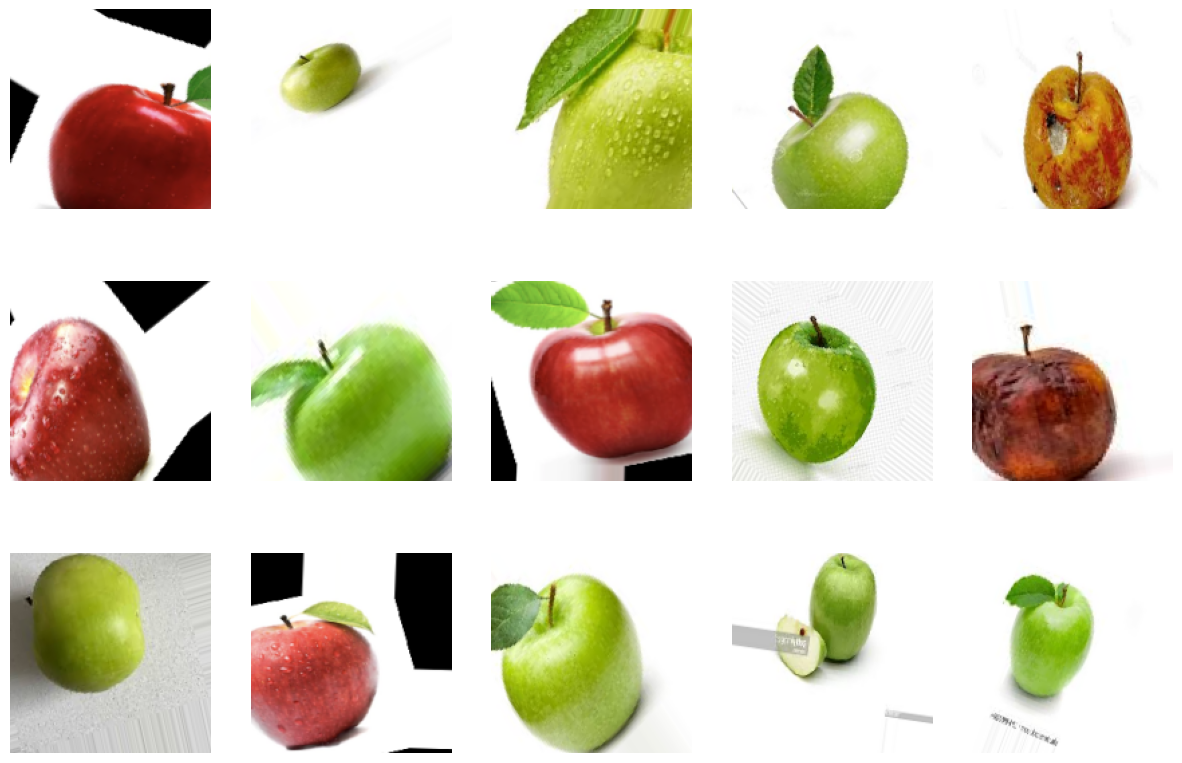

In [ ]:
# Display augmented images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for i in range(15):
    augmented_img, _ = train_set.next()
    ax = axes[i]
    ax.imshow(augmented_img[0])
    ax.axis('off')

plt.show()

In [ ]:
# check class
class_dict = train_set.class_indices
myList = list(class_dict.keys())
myList

['Overripe', 'Ripe', 'Unripe']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Conv2D, Dense, Dropout, Input, Flatten, MaxPool2D
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M

# from tensorflow.keras.applications import ResNet50V2
# from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.applications import InceptionV3

In [ ]:
import tensorflow as tf
from keras.applications import EfficientNetV2M
from keras.layers import Input

# Define the input shape
input_shape = (640, 640, 3)

# Instantiate the pre-trained model
pre_trained_model = EfficientNetV2M(weights="imagenet", include_top=False, input_shape=input_shape)

# freeze layers
for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output

# add sequential models layers
# x = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(3, activation="softmax")(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

# summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 640, 640, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 640, 640, 3)          0         ['input_6[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 320, 320, 24)         648       ['rescaling_4[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 320, 320, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                         

In [ ]:
# add sequential models layers



**Model Development**

In [ ]:
# sequential models
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [ ]:
# see model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# mycallback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    accuracy=0.92
    if(logs.get('accuracy')>accuracy and logs.get('val_accuracy')>=accuracy):
      print("\nTarget reached %2.2f%%. Stop Training!!" %(accuracy*100))
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# fitting models
history = model.fit(train_set,
                    epochs=2,
                    # steps_per_epoch = train_set.samples // 100,
                    validation_data=validation_set,
                    # validation_steps = validation_set.samples // 100,
                    verbose=1,
                    callbacks = [callbacks])

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 [==============================] - 24s 2s/step - loss: 2.6961 - accuracy: 0.5844 - val_loss: 0.9268 - val_accuracy: 0.5263
Epoch 2/2
5/5 [==============================] - 3s 601ms/step - loss: 0.6189 - accuracy: 0.8156 - val_loss: 0.9639 - val_accuracy: 0.6667


**Evaluating Model Performance**

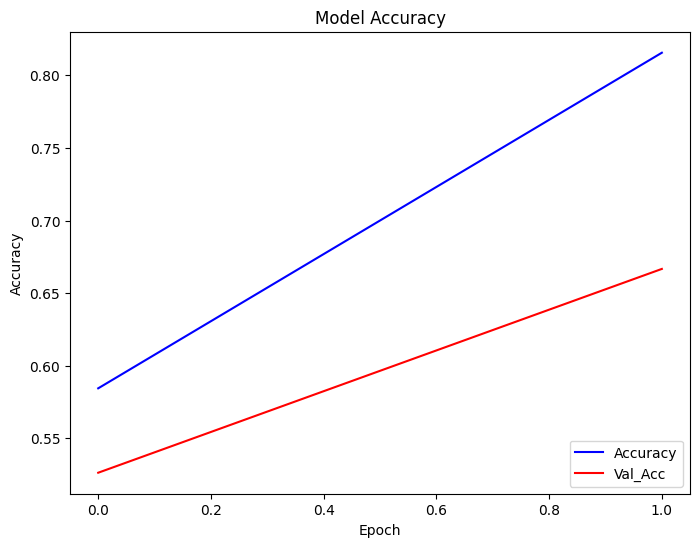

In [ ]:
# plotting accuracy metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

acc = plt.plot(history.history['accuracy'], color='blue')
val_acc = plt.plot(history.history['val_accuracy'], color='red')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Accuracy', 'Val_Acc'], loc='lower right')

plt.show()

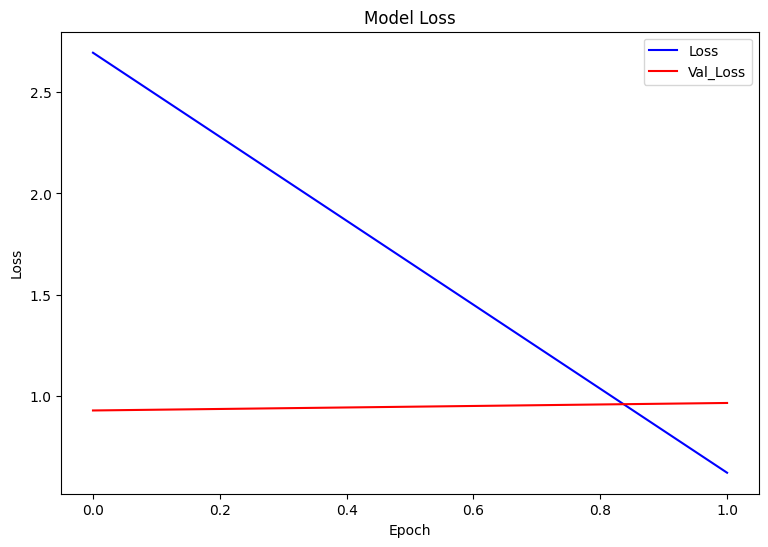

In [ ]:
# plotting loss metrics
plt.figure(figsize=(9,6))

loss = plt.plot(history.history['loss'], color='blue')
val_loss = plt.plot(history.history['val_loss'], color='red')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Loss', 'Val_Loss'], loc='upper right')

plt.show()

**Testing: Generate Confusion Matrix**

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Evaluate the model on the testing data
testing_datagen = ImageDataGenerator(rescale=1./255)

testing_set = testing_datagen.flow_from_directory(
    testing_dir,
    target_size=(150, 150),
    batch_size=100,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain the order for confusion matrix
)

Found 57 images belonging to 3 classes.


In [ ]:
# Evaluate the model on the testing set
evaluation = model.evaluate(testing_set)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

1/1 [==============================] - 0s 168ms/step - loss: 0.8321 - accuracy: 0.6667
Test Loss: 0.8320732116699219
Test Accuracy: 0.6666666865348816


In [ ]:
# Generate predictions on testing data
predictions = model.predict(testing_set)
print(predictions)

1/1 [==============================] - 0s 279ms/step
[[1.28710315e-01 7.95019507e-01 7.62702301e-02]
 [3.28253955e-02 9.60486412e-01 6.68824278e-03]
 [1.87756553e-01 6.77721560e-01 1.34521842e-01]
 [3.66736599e-03 9.95614171e-01 7.18391559e-04]
 [1.45990878e-01 7.74073958e-01 7.99351707e-02]
 [8.32633376e-02 8.70034397e-01 4.67022508e-02]
 [1.50325224e-01 1.08795851e-01 7.40878940e-01]
 [2.01262385e-01 6.54679596e-01 1.44058019e-01]
 [2.34925106e-01 2.92147160e-01 4.72927749e-01]
 [2.27951869e-01 3.16119522e-01 4.55928624e-01]
 [1.37826949e-01 7.79293239e-01 8.28797668e-02]
 [1.02958202e-01 8.51382315e-01 4.56594229e-02]
 [4.28508334e-02 9.31231201e-01 2.59179138e-02]
 [8.16232041e-02 8.73249710e-01 4.51271273e-02]
 [1.32389516e-01 7.98835099e-01 6.87753633e-02]
 [2.39235893e-01 3.41522396e-01 4.19241697e-01]
 [5.03366143e-02 9.34818208e-01 1.48452576e-02]
 [2.44109526e-01 2.68411458e-01 4.87478942e-01]
 [3.28253955e-02 9.60486412e-01 6.68824278e-03]
 [6.35095593e-03 9.92688596e-01 9.6

In [ ]:
# Convert predictions into class labels
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes)

tf.Tensor(
[1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(57,), dtype=int64)


In [ ]:
# Get true class labels
true_classes = testing_set.classes

# Compute confusion matrix
confusion_mtx = tf.math.confusion_matrix(true_classes, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
tf.Tensor(
[[ 0 14  5]
 [ 0 19  0]
 [ 0  0 19]], shape=(3, 3), dtype=int32)


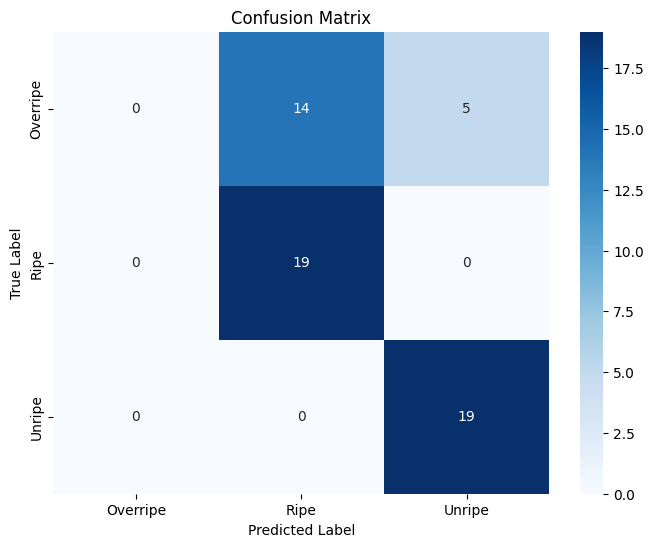

In [ ]:
# Optionally, you can visualize the confusion matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=testing_set.class_indices.keys(),
            yticklabels=testing_set.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Making Predictions**

Saving apple_2.jpg to apple_2.jpg
1/1 [==============================] - 0s 195ms/step


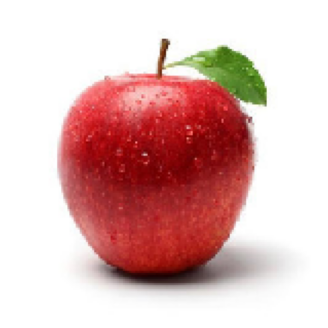

prediction: Ripe


In [ ]:
# predicting images
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import image
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  new_img = image.load_img(path, target_size=(150, 150))
  img = image.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  prediction = model.predict(img)

  x = prediction.flatten()
  j = x.argmax()
  for index, item in enumerate(x):
      if item == j:
          class_name = myList[index]

  # plot img
  plt.figure(figsize = (4,4))
  plt.imshow(new_img)
  plt.axis('off')
  plt.show()

  print("prediction:", class_name)

**Saving Models**

In [ ]:
# models conversion
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save("models/model_best.hdf5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Conclusion**

The purpose of developing the model is to classify fresh fruit and predict fresh fruit. This model will take an input image, and classify the image into one of 3 classes.

Based on the evaluation matrix seen from the accuracy graph and loss function, the model made is **good-fit** with an accuracy and val_accuracy of more than **96%**. So, we can use the model to predict a data.